# MASIRA JAINAB
# 2201020462
# CL2025010601875360
# CSE (Data Science)

# Create a web app to predict the wine quality using KNN algorithm, then deploy it using streamlit and host it in its community cloud.

In [4]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
x = df.drop("quality", axis=1)
y = df["quality"]

In [10]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(pd.DataFrame(x_scaled, columns=x.columns).head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  


In [13]:
y_binary = y.apply(lambda x: 1 if x >= 7 else 0)

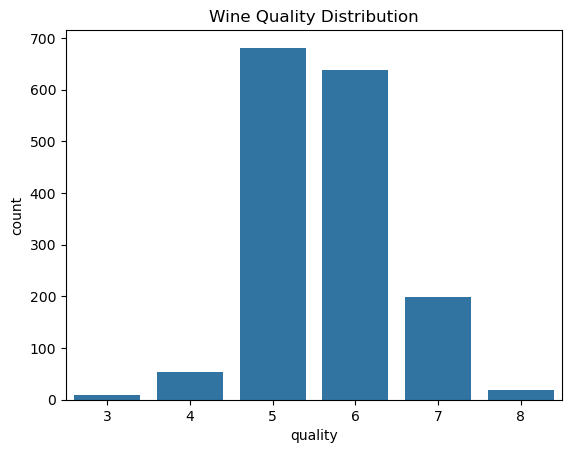

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title("Wine Quality Distribution")
plt.show()

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

# KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.55


In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  3,  6,  0,  0],
       [ 0,  2, 88, 40,  0,  0],
       [ 1,  0, 47, 74, 10,  0],
       [ 0,  0,  7, 21, 14,  0],
       [ 0,  0,  1,  1,  3,  0]], dtype=int64)

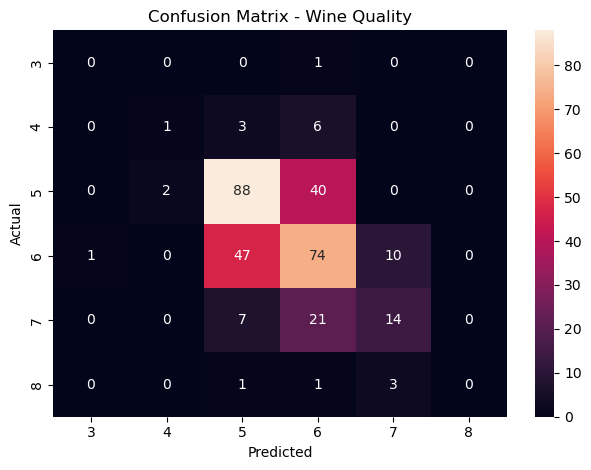

In [21]:
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Wine Quality")
plt.tight_layout()
plt.show()

In [24]:
import pickle
with open('wine_model.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Model and scaler saved successfully!!")

Model and scaler saved successfully!!
